In [50]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn.model_selection import RandomizedSearchCV

# To impute missing values
from sklearn.impute import KNNImputer
from sklearn import metrics

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# This will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### Loading Data

In [2]:
job = pd.read_csv("Cardiac.csv")

<IPython.core.display.Javascript object>

In [3]:
# Checking the number of rows and columns in the data
job.shape

(889, 13)

<IPython.core.display.Javascript object>

### Data Overview

In [4]:
# let's create a copy of the data
df = job.copy()

<IPython.core.display.Javascript object>

In [5]:
# let's view the first 5 rows of the data
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,Male,1,1,0,1,0,0,0,1,0,0,0,no
1,Male,0,1,0,1,0,0,0,1,0,0,0,no
2,Male,0,1,0,1,0,0,0,1,0,0,0,no
3,Male,0,1,0,1,0,0,0,1,0,0,0,no
4,Male,0,0,0,0,0,1,1,0,0,0,0,no


<IPython.core.display.Javascript object>

In [6]:
# let's view the last 5 rows of the data
df.tail()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
884,Female,0,1,0,1,0,0,0,1,0,0,0,no
885,Male,0,1,0,1,0,0,0,1,0,0,0,no
886,Male,0,0,1,1,0,0,0,1,0,0,0,yes
887,Female,0,1,0,0,0,0,1,1,0,0,0,no
888,Male,1,1,0,1,0,0,0,1,0,0,0,yes


<IPython.core.display.Javascript object>

In [7]:
# let's check the data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           889 non-null    object
 1   Chain_smoker                     889 non-null    int64 
 2   Consumes_other_tobacco_products  889 non-null    int64 
 3   HighBP                           889 non-null    int64 
 4   Obese                            889 non-null    int64 
 5   Diabetes                         889 non-null    int64 
 6   Metabolic_syndrome               889 non-null    int64 
 7   Use_of_stimulant_drugs           889 non-null    int64 
 8   Family_history                   889 non-null    int64 
 9   History_of_preeclampsia          889 non-null    int64 
 10  CABG_history                     889 non-null    int64 
 11  Respiratory_illness              889 non-null    int64 
 12  UnderRisk                        889

<IPython.core.display.Javascript object>

In [8]:
# let's check for duplicate values in the data
df.duplicated().sum()

789

<IPython.core.display.Javascript object>

In [9]:
# let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

Gender                             0.0
Chain_smoker                       0.0
Consumes_other_tobacco_products    0.0
HighBP                             0.0
Obese                              0.0
Diabetes                           0.0
Metabolic_syndrome                 0.0
Use_of_stimulant_drugs             0.0
Family_history                     0.0
History_of_preeclampsia            0.0
CABG_history                       0.0
Respiratory_illness                0.0
UnderRisk                          0.0
dtype: float64

<IPython.core.display.Javascript object>

In [10]:
# let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Chain_smoker,889.0,0.120360,0.325565,0.0,0.0,0.0,0.0,1.0
Consumes_other_tobacco_products,889.0,0.838020,0.368640,0.0,1.0,1.0,1.0,1.0
HighBP,889.0,0.086614,0.281427,0.0,0.0,0.0,0.0,1.0
Obese,889.0,0.919010,0.272973,0.0,1.0,1.0,1.0,1.0
Diabetes,889.0,0.055118,0.228339,0.0,0.0,0.0,0.0,1.0
Metabolic_syndrome,889.0,0.042745,0.202395,0.0,0.0,0.0,0.0,1.0
Use_of_stimulant_drugs,889.0,0.082115,0.274694,0.0,0.0,0.0,0.0,1.0
Family_history,889.0,0.925759,0.262310,0.0,1.0,1.0,1.0,1.0
History_of_preeclampsia,889.0,0.017998,0.133018,0.0,0.0,0.0,0.0,1.0
CABG_history,889.0,0.021372,0.144704,0.0,0.0,0.0,0.0,1.0


<IPython.core.display.Javascript object>

In [11]:
# let's view the statistical summary of the non-numerical columns in the data
df.describe(exclude=np.number).T

,count,unique,top,freq
Gender,889,3,Male,607
UnderRisk,889,2,no,699


<IPython.core.display.Javascript object>

In [12]:
# list of all categorical variables
cat_col = df.columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 50)

Male      607
Female    256
Other      26
Name: Gender, dtype: int64
--------------------------------------------------
0    782
1    107
Name: Chain_smoker, dtype: int64
--------------------------------------------------
1    745
0    144
Name: Consumes_other_tobacco_products, dtype: int64
--------------------------------------------------
0    812
1     77
Name: HighBP, dtype: int64
--------------------------------------------------
1    817
0     72
Name: Obese, dtype: int64
--------------------------------------------------
0    840
1     49
Name: Diabetes, dtype: int64
--------------------------------------------------
0    851
1     38
Name: Metabolic_syndrome, dtype: int64
--------------------------------------------------
0    816
1     73
Name: Use_of_stimulant_drugs, dtype: int64
--------------------------------------------------
1    823
0     66
Name: Family_history, dtype: int64
--------------------------------------------------
0    873
1     16
Name: History_of_preeclamp

<IPython.core.display.Javascript object>

## Data Pre-Processing

### Univariate analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observations on city_development_index

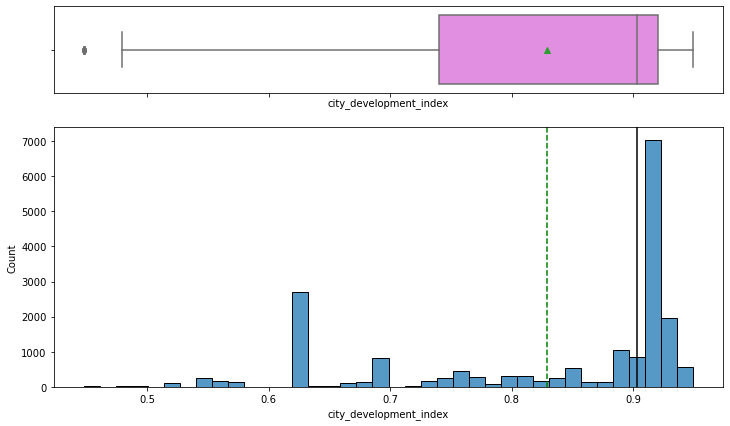

<IPython.core.display.Javascript object>

In [16]:
histogram_boxplot(df, "city_development_index")

* Distribution of city_development_index is left-skewed.
* Cities with city_development_index less than ~0.45 are outliers - such cities might be underdeveloped or tier 3 cities.
* Let's explore it further.

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on gender

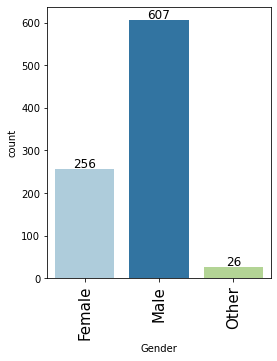

<IPython.core.display.Javascript object>

In [17]:
labeled_barplot(df, "Gender")

## Bivariate Analysis

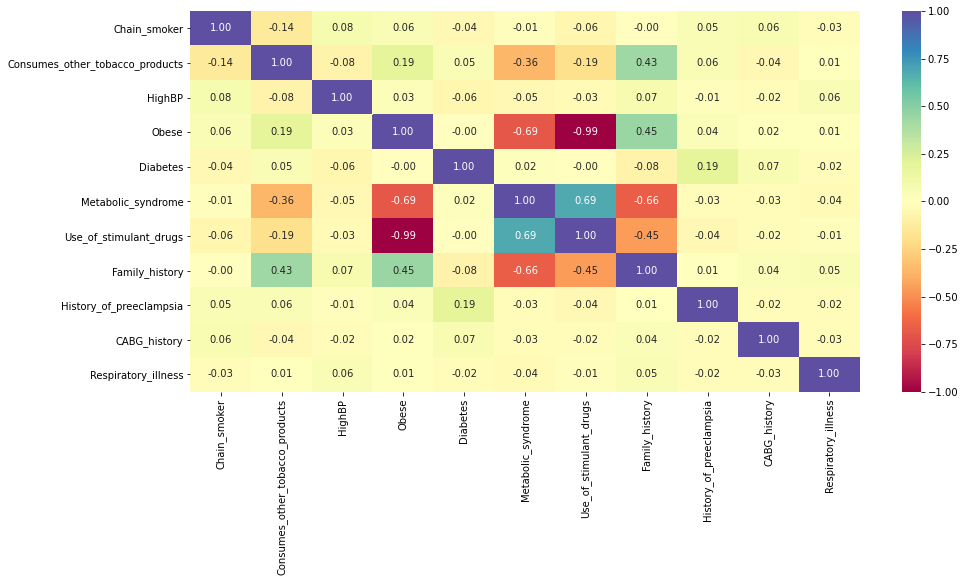

<IPython.core.display.Javascript object>

In [15]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

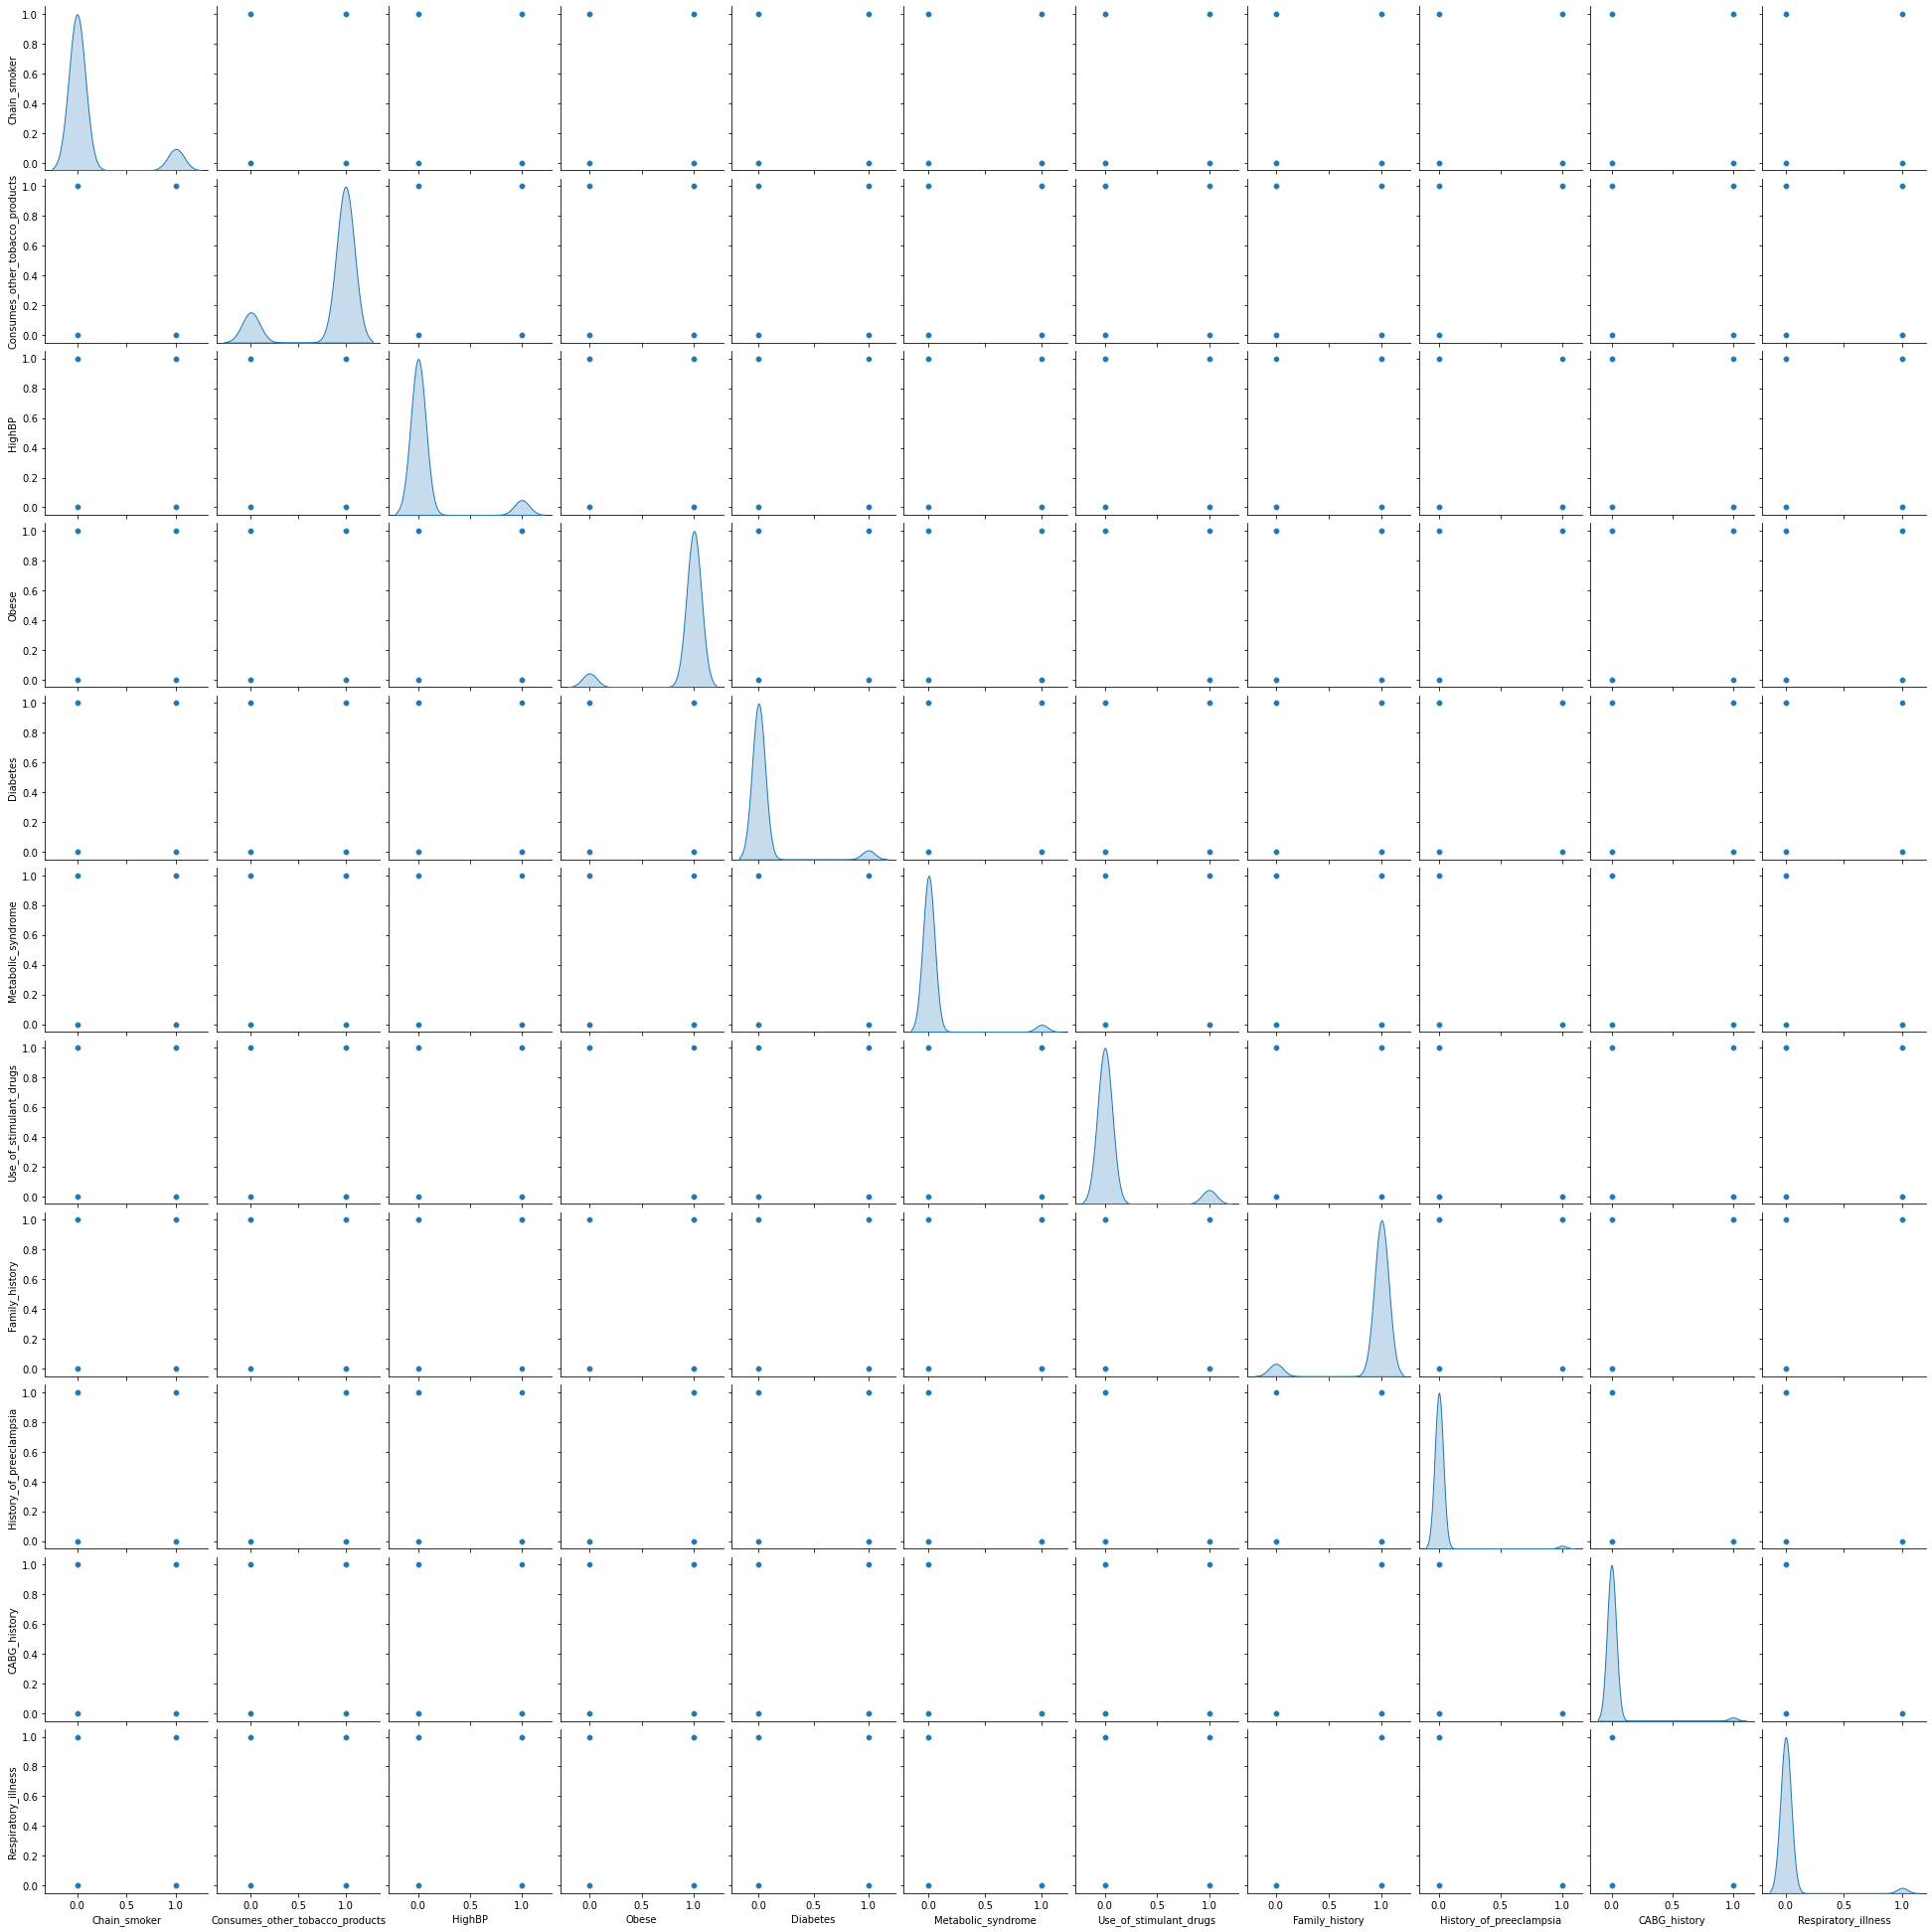

<IPython.core.display.Javascript object>

In [19]:
sns.pairplot(data=df, diag_kind="kde")
plt.show()

* Encoding 1 and 0 to 'yes' and 'no' respectively, for analysis.

In [32]:
df["UnderRisk"].replace("yes", 1, inplace=True)
df["UnderRisk"].replace("no", 0, inplace=True)

<IPython.core.display.Javascript object>

In [21]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### target vs gender

UnderRisk      no  yes  All
Chain_smoker               
All           699  190  889
0             598  184  782
1             101    6  107
------------------------------------------------------------------------------------------------------------------------


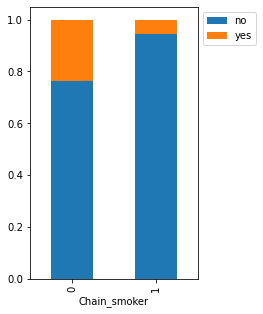

<IPython.core.display.Javascript object>

In [22]:
stacked_barplot(df, "Chain_smoker", "UnderRisk")

### target vs relevant_experience

* There's a high proportion of enrollees looking for a job change across Graduates, Masters, and High Schooler categories.
* ~30% of the graduate enrollees are looking for a job change.
* 20% of the enrollees with a master's degree are looking for a job change.

### target vs major_discipline

In [24]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### target vs training_hours

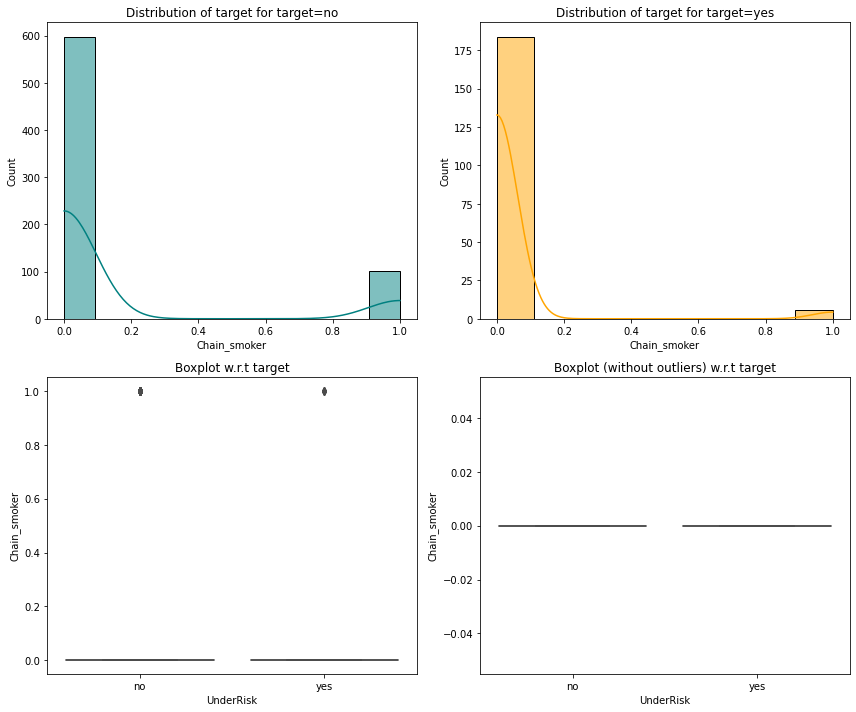

<IPython.core.display.Javascript object>

In [26]:
distribution_plot_wrt_target(df, "Chain_smoker", "UnderRisk")

In [27]:
df.isnull().sum()

Gender                             0
Chain_smoker                       0
Consumes_other_tobacco_products    0
HighBP                             0
Obese                              0
Diabetes                           0
Metabolic_syndrome                 0
Use_of_stimulant_drugs             0
Family_history                     0
History_of_preeclampsia            0
CABG_history                       0
Respiratory_illness                0
UnderRisk                          0
dtype: int64

<IPython.core.display.Javascript object>

In [34]:
df.head()

,Gender,Chain_smoker,Consumes_other_tobacco_products,HighBP,Obese,Diabetes,Metabolic_syndrome,Use_of_stimulant_drugs,Family_history,History_of_preeclampsia,CABG_history,Respiratory_illness,UnderRisk
0,Male,1,1,0,1,0,0,0,1,0,0,0,0
1,Male,0,1,0,1,0,0,0,1,0,0,0,0
2,Male,0,1,0,1,0,0,0,1,0,0,0,0
3,Male,0,1,0,1,0,0,0,1,0,0,0,0
4,Male,0,0,0,0,0,1,1,0,0,0,0,0


<IPython.core.display.Javascript object>

In [28]:
imputer = KNNImputer(n_neighbors=5)

<IPython.core.display.Javascript object>

In [53]:
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))
​
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))
​
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = [
    "gender",
    "enrolled_university",
    "education_level",
    "major_discipline",
    "experience",
    "company_size",
    "company_type",
    "last_new_job",
]

<IPython.core.display.Javascript object>

In [54]:
df[reqd_col_for_impute].head()

,gender,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,Male,no_enrollment,Graduate,STEM,>20,NaN,NaN,1
1,Male,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4
2,unknown,Full time course,Graduate,STEM,5,NaN,NaN,never
3,unknown,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never
4,Male,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4


<IPython.core.display.Javascript object>

In [55]:
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))
​
data1 = df.copy()

<IPython.core.display.Javascript object>

In [56]:
# we need to pass numerical values for each categorical column for KNN imputation so we will label encode them
gender = {"Male": 0, "Female": 1, "Other": 2}
data1["gender"] = data1["gender"].map(gender)

enrolled_university = {"no_enrollment": 0, "Full time course": 1, "Part time course": 2}
data1["enrolled_university"] = data1["enrolled_university"].map(enrolled_university)

education_level = {
    "Graduate": 0,
    "Masters": 1,
    "High School": 2,
    "Phd": 3,
    "Primary School": 4,
}
data1["education_level"] = data1["education_level"].map(education_level)

major_discipline = {
    "STEM": 0,
    "Business Degree": 1,
    "Arts": 2,
    "Humanities": 3,
    "No Major": 4,
    "Other": 5,
}
data1["major_discipline"] = data1["major_discipline"].map(major_discipline)

experience = {
    "<1": 0,
    "1": 1,
    "2": 2,
    "3": 3,
    "4": 4,
    "5": 5,
    "6": 6,
    "7": 7,
    "8": 8,
    "9": 9,
    "10": 10,
    "11": 11,
    "12": 12,
    "13": 13,
    "14": 14,
    "15": 15,
    "16": 16,
    "17": 17,
    "18": 18,
    "19": 19,
    "20": 20,
    ">20": 21,
}
data1["experience"] = data1["experience"].map(experience)

company_type = {
    "Pvt Ltd": 0,
    "Funded Startup": 1,
    "Early Stage Startup": 2,
    "Other": 3,
    "Public Sector": 4,
    "NGO": 5,
}
data1["company_type"] = data1["company_type"].map(company_type)

company_size = {
    "<10": 0,
    "10/49": 1,
    "100-500": 2,
    "1000-4999": 3,
    "10000+": 4,
    "50-99": 5,
    "500-999": 6,
    "5000-9999": 7,
}
data1["company_size"] = data1["company_size"].map(company_size)

last_new_job = {"never": 0, "1": 1, "2": 2, "3": 3, "4": 4, ">4": 5}
data1["last_new_job"] = data1["last_new_job"].map(last_new_job)

<IPython.core.display.Javascript object>

In [33]:
data1.head()

NameError: name 'data1' is not defined

<IPython.core.display.Javascript object>

* Values have been encoded.

### Data Preparation for Modeling

In [8]:
X = df.drop(["UnderRisk"], axis=1)
y = df["UnderRisk"].apply(lambda x: 1 if x == "yes" else 0)

<IPython.core.display.Javascript object>

In [9]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(533, 12) (178, 12) (178, 12)


<IPython.core.display.Javascript object>

In [10]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_val = pd.get_dummies(X_val, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)
print(X_train.shape, X_val.shape, X_test.shape)

(533, 13) (178, 13) (178, 13)


<IPython.core.display.Javascript object>

## Building the model

### Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting an enrollee is looking for a job change but in reality, the enrollee is not looking for a change - Loss of resources
2. Predicting an enrollee is not looking for a job change but the enrollee is looking for a job change  - Loss of opportunity

#### Which case is more important? 
* Predicting an enrollee is not looking for a job change but the enrollee is looking for a job change i.e. losing on a potential candidate as the candidate will not be targeted by the HR team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company would want Recall to be maximized, greater the Recall lesser the chances of false negatives.

In [11]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [12]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression 

In [13]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

In [14]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.787992,0.035088,0.571429,0.066116


<IPython.core.display.Javascript object>

In [15]:
# Calculating different metrics on validation set
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
print("Validation performance:")
log_reg_model_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.769663,0.026316,0.2,0.046512


<IPython.core.display.Javascript object>

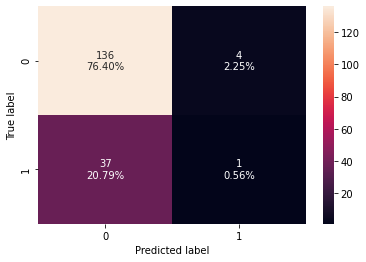

<IPython.core.display.Javascript object>

In [16]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_val, y_val)

* Logistic Regression has given a generalized performance on training and validation set.
* Recall is very low, we can try oversampling (increase training data) to see if the model performance can be improved.

### Oversampling train data using SMOTE

In [17]:
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 114
Before Oversampling, counts of label 'No': 419 

After Oversampling, counts of label 'Yes': 419
After Oversampling, counts of label 'No': 419 

After Oversampling, the shape of train_X: (838, 13)
After Oversampling, the shape of train_y: (838,) 



<IPython.core.display.Javascript object>

### Logistic Regression on oversampled data

In [18]:
log_reg_over = LogisticRegression(random_state=1)

# Training the basic logistic regression model with training set
log_reg_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

* Performance of model on training set varies between 0.77 to 0.79, which is an improvement from the previous model
* Let's check the performance on the validation set.

In [19]:
# Calculating different metrics on train set
log_reg_over_train_perf = model_performance_classification_sklearn(
    log_reg_over, X_train_over, y_train_over
)
print("Training performance:")
log_reg_over_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.674224,0.775656,0.644841,0.704225


<IPython.core.display.Javascript object>

In [20]:
# Calculating different metrics on validation set
log_reg_over_val_perf = model_performance_classification_sklearn(
    log_reg_over, X_val, y_val
)
print("validation performance:")
log_reg_over_val_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.601124,0.631579,0.296296,0.403361


<IPython.core.display.Javascript object>

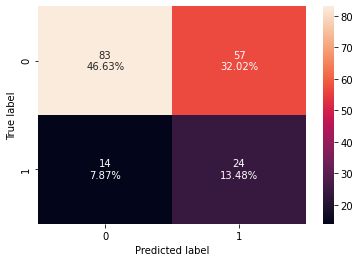

<IPython.core.display.Javascript object>

In [21]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_over, X_val, y_val)

In [22]:
bagging_lr = BaggingClassifier(random_state=1)
bagging_lr.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [23]:
# Calculating different metrics on validation set
bagging_lr_perf = model_performance_classification_sklearn(bagging_lr, X_val, y_val)
print("validation performance:")
bagging_lr_perf

validation performance:


,Accuracy,Recall,Precision,F1
0,0.573034,0.605263,0.27381,0.377049


<IPython.core.display.Javascript object>

In [24]:
# Train the random forest classifier
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [25]:
# Calculating different metrics on train set
rf_estimator_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance:")
rf_estimator_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.801126,0.175439,0.625,0.273973


<IPython.core.display.Javascript object>

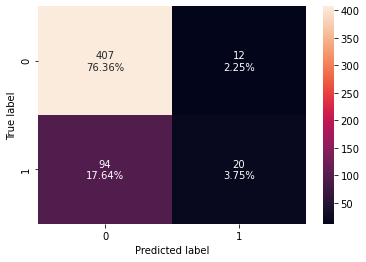

<IPython.core.display.Javascript object>

In [26]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [27]:
bagging = BaggingClassifier(random_state=1)
bagging.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [28]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [29]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

In [30]:
decision_tree = DecisionTreeClassifier(random_state=1)
decision_tree.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [35]:
scoring = "recall"

kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5

cv_result = cross_val_score(
    estimator=bagging, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
cv_result
np.average(cv_result)

0.7804073436603557

<IPython.core.display.Javascript object>

In [36]:
scoring = "recall"

kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5

cv_result = cross_val_score(
    estimator=rf_estimator, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
cv_result
np.average(cv_result)

0.7780550774526678

<IPython.core.display.Javascript object>

In [42]:
scoring = "recall"

kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5

l_cv_result = cross_val_score(
    estimator=lr, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
l_cv_result


array([0.78571429, 0.73809524, 0.70238095, 0.78313253, 0.83333333])

<IPython.core.display.Javascript object>

In [43]:
scoring = "recall"

kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5

d_cv_result = cross_val_score(
    estimator=decision_tree, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
)
d_cv_result


array([0.76190476, 0.80952381, 0.69047619, 0.77108434, 0.8452381 ])

<IPython.core.display.Javascript object>

In [46]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [52]:
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV

randomized_cv = RandomizedSearchCV(
    estimator=abc,
    param_distributions=param_grid,
    n_jobs=-1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
)

<IPython.core.display.Javascript object>

In [53]:
search = randomized_cv.fit(X_train_over, y_train_over)

<IPython.core.display.Javascript object>

In [54]:
search.best_params_

{'n_estimators': 50,
 'learning_rate': 0.01,
 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=1)}

<IPython.core.display.Javascript object>

In [59]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [60]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [61]:
abc_under = AdaBoostClassifier(random_state=1)
abc_under.fit(X_train_un, y_train_un)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

In [62]:
# Calculating different metrics on train set
abc_perf = model_performance_classification_sklearn(abc, X_train_over, y_train_over)
print("Training performance:")
abc_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.670644,0.787589,0.638298,0.705128


<IPython.core.display.Javascript object>

In [64]:
# Calculating different metrics on train set
abc_under_perf = model_performance_classification_sklearn(
    abc_under, X_train_un, y_train_un
)
print("Training performance:")
abc_under_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.70614,0.842105,0.662069,0.741313


<IPython.core.display.Javascript object>

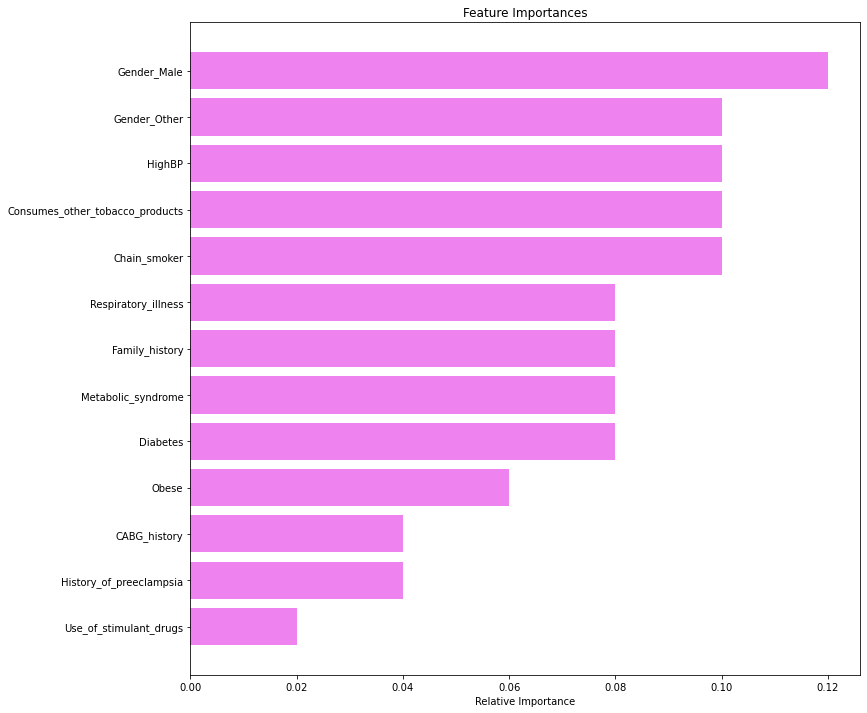

<IPython.core.display.Javascript object>

In [68]:
importances = abc_under.feature_importances_
indices = np.argsort(importances)
feature_names = list(X_train_un.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Regularization

In [82]:
# Choose the type of classifier.
lr_estimator = LogisticRegression(random_state=1, solver="saga")

# Grid of parameters to choose from
parameters = {"C": np.arange(0.1, 1.1, 0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring="recall")
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

<IPython.core.display.Javascript object>

In [83]:
# Calculating different metrics on train set
log_reg_reg_train_perf = model_performance_classification_sklearn(
    lr_estimator, X_train_over, y_train_over
)
print("Training performance:")
log_reg_reg_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.766052,0.715693,0.79585,0.753646


<IPython.core.display.Javascript object>

In [84]:
# Calculating different metrics on validation set
log_reg_reg_val_perf = model_performance_classification_sklearn(
    lr_estimator, X_val, y_val
)
print("Validation performance:")
log_reg_reg_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.750783,0.546025,0.500479,0.522261


<IPython.core.display.Javascript object>

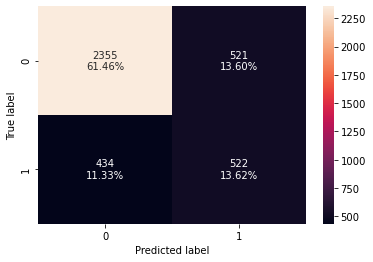

<IPython.core.display.Javascript object>

In [85]:
# creating confusion matrix
confusion_matrix_sklearn(lr_estimator, X_val, y_val)

* After regularization, overfitting has reduced to some extent and the model is also performing well.
* Let's try undersampling now.

### Undersampling train data using Random Under Sampler

In [86]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [87]:
print("Before Undersampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Undersampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Undersampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Undersampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Undersampling, counts of label 'Yes': 2866
Before Undersampling, counts of label 'No': 8628 

After Undersampling, counts of label 'Yes': 2866
After Undersampling, counts of label 'No': 2866 

After Undersampling, the shape of train_X: (5732, 56)
After Undersampling, the shape of train_y: (5732,) 



<IPython.core.display.Javascript object>

### Logistic Regression on undersampled data

In [88]:
log_reg_under = LogisticRegression(random_state=1)
log_reg_under.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

**Let's evaluate the model performance by using KFold and cross_val_score**

- `K-Folds cross-validation` provides dataset indices to split data into train/validation sets. Split dataset into k consecutive stratified folds (without shuffling by default). Each fold is then used once as validation while the k - 1 remaining folds form the training set.

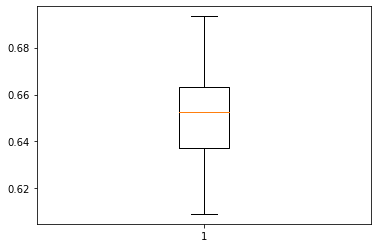

<IPython.core.display.Javascript object>

In [89]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_under = cross_val_score(
    estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

* Performance of model on training set varies between 0.62 to 0.69, which is an improvement from the initial model(without oversampling)
* Let's check the performance on the validation set.

In [90]:
# Calculating different metrics on train set
log_reg_under_train_perf = model_performance_classification_sklearn(
    log_reg_under, X_train_un, y_train_un
)
print("Training performance:")
log_reg_under_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.706036,0.658409,0.727728,0.691335


<IPython.core.display.Javascript object>

In [91]:
# Calculating different metrics on validation set
log_reg_under_val_perf = model_performance_classification_sklearn(
    log_reg_under, X_val, y_val
)
print("Validation performance:")
log_reg_under_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.731994,0.665272,0.473567,0.553284


<IPython.core.display.Javascript object>

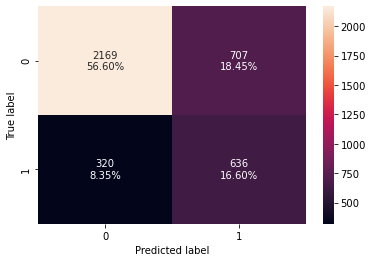

<IPython.core.display.Javascript object>

In [92]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_val, y_val)

* Model has given a generalized performance on training and validation set.
* Model performance has improved using undersampling - Logistic regression is now able to differentiate well between positive and negative classes.

In [93]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_over_train_perf.T,
        log_reg_reg_train_perf.T,
        log_reg_under_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Regularised Logistic Regression",
    "Logistic Regression with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression,Logistic Regression with oversampled data,Regularised Logistic Regression,Logistic Regression with undersampled data
Accuracy,0.766226,0.824467,0.766052,0.706036
Recall,0.266225,0.787089,0.715693,0.658409
Precision,0.566444,0.850683,0.795850,0.727728
F1,0.362212,0.817651,0.753646,0.691335


<IPython.core.display.Javascript object>

In [94]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_val_perf.T,
        log_reg_over_val_perf.T,
        log_reg_reg_val_perf.T,
        log_reg_under_val_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression with oversampled data",
    "Regularised Logistic Regression",
    "Logistic Regression with undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Logistic Regression,Logistic Regression with oversampled data,Regularised Logistic Regression,Logistic Regression with undersampled data
Accuracy,0.761482,0.747390,0.750783,0.731994
Recall,0.267782,0.405858,0.546025,0.665272
Precision,0.544681,0.492386,0.500479,0.473567
F1,0.359046,0.444954,0.522261,0.553284


<IPython.core.display.Javascript object>

* Logistic regression model on undersampled data has given a generalized performance with the highest recall on validation data.

### We can see that model tuned using undersampled data is best, let's check the performance of test data

In [95]:
# Calculating different metrics on validation set
log_reg_under_test_perf = model_performance_classification_sklearn(
    log_reg_under, X_test, y_test
)
print("Test performance:")
log_reg_under_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.720772,0.657592,0.45806,0.539983


<IPython.core.display.Javascript object>

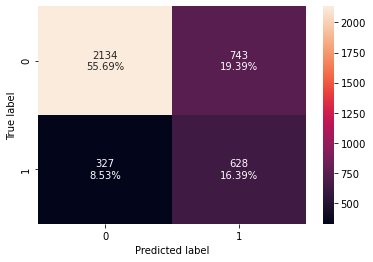

<IPython.core.display.Javascript object>

In [96]:
# creating confusion matrix
confusion_matrix_sklearn(log_reg_under, X_test, y_test)

- Model trained with undersampled data has given generalised performance on the test set

### Finding the coefficients

In [97]:
# let us check the coefficients and intercept of the model (lin. and log. reg. sklearn)

coef_df = pd.DataFrame(
    np.append(log_reg_under.coef_, log_reg_under.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,city_development_index,training_hours,city_Developing,city_Developed,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never,Intercept
Coefficients,-0.576723,-0.000576,-1.500855,-1.421132,-0.065273,0.224627,0.446938,-0.420036,-0.498695,-0.846301,...,-0.394533,0.046605,-0.136525,-0.207815,-0.044009,0.153668,0.275509,0.046599,-0.206702,1.519231


<IPython.core.display.Javascript object>

### Coefficient interpretations

* Coefficient of gender_Other, relevent_experience_No relevant experience, company_type_Other, last_new_job_2, etc are positive, increase in these will lead to an increase in chances of a person looking for a job change
* Coefficient of city_development_index, training_hours, city_Developing, city_Developing, etc are negative increase in these will lead to a decrease in chances of a person not looking for a job change

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

* Odds from coefficients

In [98]:
odds = np.exp(log_reg_under.coef_[0])  # converting coefficients to odds
pd.set_option(
    "display.max_columns", None
)  # removing limit from number of columns to display
pd.DataFrame(
    odds, X_train.columns, columns=["odds"]
).T  # adding the odds to a dataframe

,city_development_index,training_hours,city_Developing,city_Developed,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,experience_10,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
odds,0.561736,0.999424,0.222939,0.24144,0.936811,1.251855,1.563518,0.657023,0.607322,0.428999,0.756446,0.758875,0.397971,1.336403,1.218202,1.298172,1.009073,1.188488,0.867829,1.207786,0.878801,1.075549,1.115086,1.012646,0.81561,0.85895,0.723161,0.852555,1.118408,0.962811,1.127363,1.23576,0.976556,1.059814,1.217434,0.998306,1.059714,1.633759,0.950285,1.191549,2.087791,1.450154,1.138502,0.939812,1.162537,0.806659,1.414875,0.673995,1.047708,0.872384,0.812358,0.956945,1.166104,1.317202,1.047701,0.813262


<IPython.core.display.Javascript object>

* Percentage change in odds